# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Введение:**<br>
В этом проекте мы исследуем данные данные сервиса Яндекс.Недвижимость о продаже квартир в Санкт-Петербурге и Ленинградской области. <br>
Предстоит ознакомится с данными представленными в датасете, опредлить количество пропусков в данных и выявить намальные значения. При необходимости заполнить или удалить пропуски если они не повлияют на итоги исследования, и отфильторовать анамальные, малочисленные значения.<br>
Целью проекта является определение факторов влияющих на итоговую стоимость недвижимости и то как изменяется стоимость квартир в зависимости от изменения этиф факторов.<br>

### Откройте файл с данными и изучите общую информацию. 

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [81]:
DATE_FORMAT = '%Y-%m-%d'

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


-last_price Минимальная цена: 12190.0 Медианная цена: 4650000.0 Средняя цена: 6541548.771551542 Максимальная цена: 763000000.0
-ceiling_height количество пропусков: 9195 это 38.80%
-floors_total количество пропусков: 86 это 0.36%
-living_area количество пропусков: 1903 это 8.03%
-is_apartment [nan False True] количество пропусков: 20924
-kitchen_area количество пропусков: 2278 это 9.61%
-balcony количество пропусков: 11519
-locality_name количество пропусков: 49 это 0.21%
-airports_nearest количество пропусков: 5542 это 23.38%
-cityCenters_nearest количество пропусков: 5519 это 23.29%
-parks_around3000 количество пропусков: 5518 это 23.28%
-parks_nearest количество пропусков: 15620 это 65.91%
-ponds_around3000 количество пропусков: 5518 это 23.28%
-ponds_nearest количество пропусков: 14589 это 61.56%
-days_exposition количество пропусков: 3181 это 13.42%


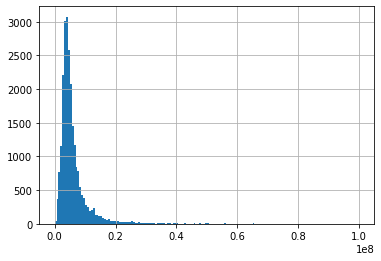

In [6]:

display(data.describe().T)
print('-last_price','Минимальная цена:',data['last_price'].min(),
       'Медианная цена:',data['last_price'].median(),
       'Средняя цена:',data['last_price'].mean(),
       'Максимальная цена:',data['last_price'].max()
      )
data['last_price'].hist(bins=160, range=(0, 1e+08))

print('-ceiling_height', 'количество пропусков:',data['ceiling_height'].isna().sum(), 'это {:.2%}'.format(data['ceiling_height'].isna().mean()))
print('-floors_total', 'количество пропусков:',data['floors_total'].isna().sum(), 'это {:.2%}'.format(data['floors_total'].isna().mean()))
print('-living_area', 'количество пропусков:',data['living_area'].isna().sum(), 'это {:.2%}'.format(data['living_area'].isna().mean()))
print('-is_apartment', data['is_apartment'].unique(), 'количество пропусков:', data['is_apartment'].isna().sum())
print('-kitchen_area', 'количество пропусков:',data['kitchen_area'].isna().sum(), 'это {:.2%}'.format(data['kitchen_area'].isna().mean()))
print('-balcony', 'количество пропусков:',data['balcony'].isna().sum())
print('-locality_name', 'количество пропусков:',data['locality_name'].isna().sum(), 'это {:.2%}'.format(data['locality_name'].isna().mean()))
print('-airports_nearest', 'количество пропусков:',data['airports_nearest'].isna().sum(), 'это {:.2%}'.format(data['airports_nearest'].isna().mean()))
print('-cityCenters_nearest', 'количество пропусков:',data['cityCenters_nearest'].isna().sum(), 'это {:.2%}'.format(data['cityCenters_nearest'].isna().mean()))
print('-parks_around3000', 'количество пропусков:',data['parks_around3000'].isna().sum(), 'это {:.2%}'.format(data['parks_around3000'].isna().mean()))
print('-parks_nearest', 'количество пропусков:',data['parks_nearest'].isna().sum(), 'это {:.2%}'.format(data['parks_nearest'].isna().mean()))
print('-ponds_around3000', 'количество пропусков:',data['ponds_around3000'].isna().sum(), 'это {:.2%}'.format(data['ponds_around3000'].isna().mean()))
print('-ponds_nearest', 'количество пропусков:',data['ponds_nearest'].isna().sum(), 'это {:.2%}'.format(data['ponds_nearest'].isna().mean()))
print('-days_exposition', 'количество пропусков:',data['days_exposition'].isna().sum(), 'это {:.2%}'.format(data['days_exposition'].isna().mean()))

In [27]:
for col_name, row in data.items():
    print(col_name, 'количество пропусков:', row.isna().sum(), 'это {:.2%}'.format(row.isna().mean()))


total_images количество пропусков: 0 это 0.00%
last_price количество пропусков: 0 это 0.00%
total_area количество пропусков: 0 это 0.00%
first_day_exposition количество пропусков: 0 это 0.00%
rooms количество пропусков: 0 это 0.00%
ceiling_height количество пропусков: 9195 это 38.80%
floors_total количество пропусков: 86 это 0.36%
living_area количество пропусков: 1903 это 8.03%
floor количество пропусков: 0 это 0.00%
is_apartment количество пропусков: 20924 это 88.29%
studio количество пропусков: 0 это 0.00%
open_plan количество пропусков: 0 это 0.00%
kitchen_area количество пропусков: 2278 это 9.61%
balcony количество пропусков: 11519 это 48.61%
locality_name количество пропусков: 49 это 0.21%
airports_nearest количество пропусков: 5542 это 23.38%
cityCenters_nearest количество пропусков: 5519 это 23.29%
parks_around3000 количество пропусков: 5518 это 23.28%
parks_nearest количество пропусков: 15620 это 65.91%
ponds_around3000 количество пропусков: 5518 это 23.28%
ponds_nearest колич

 **Вывод:**  <br>  <br>
Методом `info()` получили общую информацию о файле, которая включает в себя количество, столбцов и строк, наименование столбцов, информацию о пропущенных значениях и о типе значений в каждом столбце.<br> 
Файл `real_estate_data` содержит датафрейм с данными об объектах недвижимости. Таблица состоит из 22-х столбцов и 23699и строк с индексами от 0 до 23698. <br>
По результатам работы методов `info()` и `describe()` получили информацию о значениях в каждом столбце: <br>
- `total_images` - содержит данные о количестве фотографий по каждому объекту недвижимости. Тип значений `int64` - целые числа. В столбце 23699 значений, а значит пропусков нет, минимальное `min` значение 0, максимальное `max` значение 50, среднее `mean` значение 9.8 можно округлить до 10, медианное `median` значение 9. Значение 0 в данных столбца нельзя считать пропуском или ошибкой, это означает что продавец не загружал фотографии объекта. <br>
- `last_price` - содержит данные о стоимости объекта на момент снятия объявления, также это можно считать стоимостью, за которую этот объект был продан. Тип значений `float64` - вещественные числа или дробные. В столбце 23699 значений, а значит пропусков нет, `min` значение 12190, `max` значение 763000000, `mean` значение 6541549, `median` значение 4650000. Цены указаны в рублях, но минимальное значение значительно ниже реальной стоимости квартиры, это может быть ошибка, не верно поставлена запятая, не хватает двух или трех нулей, либо не верно была указана категория объявления и это арендная стоимость. В данных большая разница между средним и медианным значениями, это говорит о том что в данных присутствуют выбросы в сторону высокой стоимости. Гистограмма конечной стоимости имеет форму распределения Пуассона. Гистограмма имеет длинный хвост слева, это увеличение стоимости. Максимальное значение может являться ошибочным, но может быть и реальной стоимостью. Данные требуют дополнительного анализа. <br>
- `total_area` - общая площадь квартиры в квадратных метрах (м²). Тип значений `float64` - вещественные числа. Пропусков в значениях нет. `min` значение 12, максимальное `max` 900, среднее `mean` 60.348651, медианное `median` значение 52. Минимальное и максимальное значения хоть и выглядят не совсем правдоподобно, вполне могут быть реальными, если 12 (м) квадратных это площадь студии, 900 квадратных метров может быть площадь квартиры, которая занимает целый этаж или несколько этажей в доме или это жилой дом целиком. Среднее и медианное значения достаточно близки, но будет не лишним дополнительно проанализировать значения данного столбца. <br>
- `first_day_exposition` - дата публикации. Тип значений `object` - объект или строка. Значения в данном столбце необходимо перевести в формат Datetime. <br>
- `rooms` Тип значений `int64` - целые числа. В столбце 23699 значений, а значит пропусков нет. `min` = 0, `max` = 19 , `mean` = 2,07, так как тип значений целые числа можно округлить до 2, `median` = 2. Значение 0 может означать что это квартира студия, но может быть и указанно ошибочно, максимальное значение 19 выглядит не совсем правдоподобно, но может быть и правдой. Данные требуют дополнительного анализа. <br>
- `ceiling_height` высота потолков, судя по значениям указаны в метрах. Тип значений `float64` - вещественные числа. Максимальное значение 100м и минимальное 1м явно указаны ошибочно. Среднее значение 2.771499м и медианное 2.65м близки, все же среднее больше, возможно в значениях есть выбросы или ошибки. Необходимо дополнительно проанализировать данный столбец. Так же в значениях данного столбца имеются пропущенные значения NaN, 9195 значений, это почти 39%. Пропуски вызваны человеческим фактором и могут быть как случайные, так и не случайные. <br>
- `floors_total` - Всего этажей в доме. Тип значений `float64` - вещественные числа. `min` значение 1, максимальное `max` значение 60, среднее `mean` значение 10.673824, медианное `median` значение 9. Максимальное значение 60, не может быть правдоподобным, так как жилых домов выше 37 этажей в Санкт-Петербурге нет, а значит это значение ошибочное. Так же в значениях присутствуют пропуски, пропущено 86 значений, это 0,36%. <br>
- `living_area` - жилая площадь в квадратных метрах. Тип значений `float64` - вещественные числа. В значениях присутствуют пропуски, пропущено 1903 значений, это 8,03%. `min` значение 2 квадратных метра, явно ошибочное, `max` значение 406 квадратных метров может быть правдой если это значение соответствует объекту с общей площадью 900 квадратных метров. Значения необходимо проверить. Среднее 34.457852 и медианное 30 значение достаточно близки друг к другу. <br>
- `floor` данные об этаже не котором располагается объект недвижимости. Тип значений `int64` - целые числа. В столбце пропусков нет. данные выглядят правдоподобно. При необходимости можно только проверить соответствие, что бы значения столбца не превышали значения столбца `floors_total`. <br>
- `is_apartment` - информация о типе обекта, апартаменты или нет. Тип значений `object` - объект или строка, но судя по значениям должен быть тип `bool`. Имеется много пропусков 20924, при необходимости, нужно будет поменять тип данных и заменить пропущенные значения. <br>
-  `studio` и `open_plan` - информация о типе объекта студия или нет, свободная планировка или нет. Тип данных `bool`, пропущенные значения отсутствуют. <br>
-  `kitchen_area` - площадь кухни в квадратных метрах. Тип значений `float64` - вещественные числа. `min` значение 1,3м², максимальное `max` 112м², среднее `mean` 10.569807м², медианное `median` значение 9,1м². Минимальное значение выглядит неправдоподобно, максимальное значение может быть правдой если ему соответствуют дольше значения жилой и общей площади. Данные требуют дополнительного внимания. <br>
- `balcony` - информация о количестве балконов. Тип значений `float64` - вещественные числа, но лучше поменять на `int64`. `min` значение 0, максимальное `max` 5, медианное `median` значение 1. Данные выглядят правдиво, но имеют много пропусков. Пропуски в данном случае могут означать как отсутствие балкона, так и то, что продавец не указал количество балконов. При необходимости пропущенные значения можно будет заменить на 0. <br>
- `locality_name` - название населённого пункта. Тип значений `object` - объект или строка. В значениях имеются пропуски 49, это 0.2%. <br>
- `airports_nearest` - информация о расстоянии до ближайшего аэропорта в метрах. Тип значений `float64` - вещественные числа. `min` значение 0, максимальное `max` 84869, среднее `mean` 28793.672193 и медианное `median` значение 26726.0. Минимальное значение не может быть нулевым, это явно ошибочное значение. Имеются пропуски 5542, это больше 23%. Значения расстояний до объектов являются картографическими и пропуски значений в таких данных носят технический характер. <br>
- `cityCenters_nearest` - информация о расстоянии до расстояние до центра города. Тип значений `float64` - вещественные числа. `min` значение 181, максимальное `max` 65968, среднее `mean` 14191.277833 и медианное `median` значение 13098.50. Данные выглядит вполне правдоподобно. Имеются пропуски 5519, это больше 23%. Такие пропуски возможно устранить заменив на средние или медианные значения. <br>
- `parks_around3000` - число парков в радиусе 3 км. Тип значений `float64` - вещественные числа, но логичнее будет поменять на целые числа. `min` значение 0, максимальное `max` 3, среднее `mean` 0.61 и медианное `median` значение 0. Данные выглядят вполне логично и правдоподобно, но имеют пропуски 5518, это чуть больше 23%. Пропуски в таких данных могут говорить о том, что парков в радиусе 3км нет. <br>
- `parks_nearest` расстояние до ближайшего парка в метрах. Тип значений `float64` - вещественные числа. `min` значение 1м, максимальное `max` 3190м. Данные выглядят вполне правдоподобно, но если максимальное значение 3190м, то почти возле каждого объекта должен находиться как минимум один парк. Стоит сравнить со столбцом `parks_around3000`. Также имеются пропущенные значения 15620, это почти 66%. Возможно пропуски — это расстояния более 3200м, а возможно пропуски, которые можно заменить средним или медианным значениями. <br>
- `ponds_around3000` - число водоёмов в радиусе 3 км. Тип значений `float64` - вещественные числа, но логичнее будет поменять на целые числа. `min` значение 0, максимальное `max` 3, среднее `mean` 0.77 и медианное `median` значение 1. Данные выглядят вполне логично и правдоподобно, учитывая, что город построен на воде. Но имеют пропуски 5518, это чуть больше 23%. Пропуски в таких данных могут говорить о том, что водоемов в радиусе 3км просто нет. <br>
- `ponds_nearest` расстояние до ближайшего водоёма в метрах. Тип значений `float64` - вещественные числа. `min` значение 13м, максимальное `max` 1344м. Данные выглядят вполне правдоподобно, но если максимальное значение 1344м, то почти возле каждого объекта должен находиться водоем. Стоит сравнить со столбцом `ponds_around3000`. Также имеются пропущенные значения 14589, это почти 62%. Возможно, пропуски — это расстояния более 1344м. <br>
- `days_exposition` сколько дней было размещено объявление (от публикации до снятия). Тип значений `float64` - вещественные числа, но лучше сделать `int64`. `min` значение 1 день (бывает и такое), максимальное `max` 1580 дней — это более 4 лет, но вполне возможно. Среднее `mean` 181 день и медианное `median` значение 95 дней, сильно отличаются, возможно в значениях есть выбросы в большую сторону. Также имеются пропущенные значения 3181, это немного больше 13%. Значения в данном столбце, необходимо проверить.  Есть теория что пропущенные значения объявления которые на момент составления датафрейма еще не были сняты с пубдикации, то есть это количество дней с момента публикации до самой позней даты в столбце `first_day_exposition`.  <br>



### Предобработка данных

#### Изучение параметра стоимость обекта

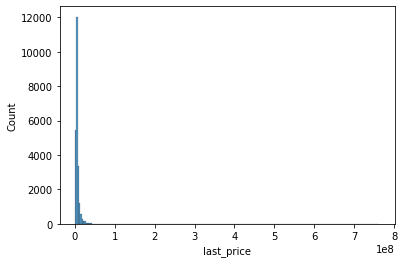

In [67]:
sns.histplot(data=data, x='last_price', bins=230)
plt.show()

Text(0.5, 1.0, 'стоимось квартир')

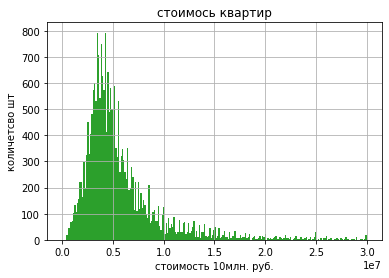

In [72]:
data['last_price'].hist(bins=230, range=(0, 30000000)).set_xlabel('стоимость 10млн. руб.')
data['last_price'].hist(bins=230, range=(0, 30000000)).set_ylabel('количетсво шт')
data['last_price'].hist(bins=230, range=(0, 30000000)).set_title('стоимось квартир')


Гистограмма имеет вид распределения Пуассона. от 430 тыс. руб. до 2 мил. туб. навлюдается увеличение количества обектов недвидимисти. Основная часть квартир находится в ценовой категории от 2 до 6 миллионоврублей. Количество квартир стоимостью от 6 до 10 плавно уменьшается, а количество квартир стоимостью то 10 до 15 милионов рублей почти одинаковое. Уменьшение количиства объектой с высокой стоимостью плавно уменьшается и у распределения вытягивается длинный шлейф в сторону увелечения стоимости. 

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

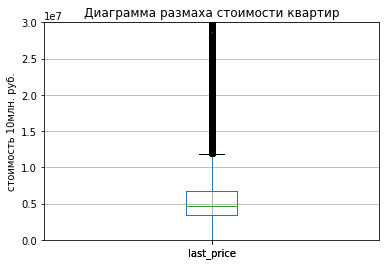

In [74]:
plt.ylim(0, 30000000)
data.boxplot(column='last_price').set_ylabel('стоимость 10млн. руб.')
data.boxplot(column='last_price').set_title('Диаграмма размаха стоимости квартир')
data['last_price'].describe()

`min` значение 12190, `max` значение 763000000, `mean` значение 6541549, `median` значение 4650000. Среднее значение значительно больше медианного из-за очень высокой стоимости нескольких обектов. Для проведения исследования удобно будет сассматривать срез стоимости от 800 тыс. руб. до 18 мил. руб.

Так же проверим объект с анамально низкой стоимостью. Судя по данным остальных столбцов это двухкомнатная квартира, которая находится не далеко от центра города, площадью 109 квадратных метра. Так что скорее всего при заполнении формы объявления продавец указал не верное количество нулей. Поменяем значение 12190 на 12 190 000.

In [6]:
#display(data[data['last_price'] == 12190])
data.loc[8793, 'last_price'] = 12190000
display(data.loc[8793:8794])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190000.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,...,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
8794,20,11000000.0,65.6,2017-10-26T00:00:00,2,NaN,10.0,37.4,9,NaN,...,11.2,2.0,Санкт-Петербург,23604.0,5294.0,0.0,NaN,1.0,434.0,269.0


#### Изучение параметра общая площадь

Text(0.5, 1.0, 'общая площадь квартир в м²')

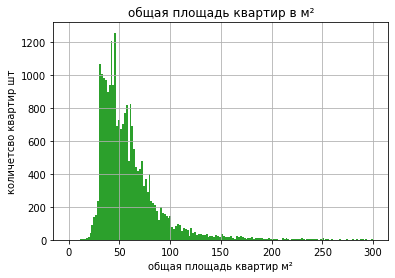

In [77]:
data['total_area'].hist(bins=160, range=(0, 300)).set_xlabel('общая площадь квартир м²')
data['total_area'].hist(bins=160, range=(0, 300)).set_ylabel('количетсво квартир шт')
data['total_area'].hist(bins=160, range=(0, 300)).set_title('общая площадь квартир в м²')

Гистограмма имеет вид распределения Пуассона. Основная часть квартир площадью от 30 квадратных метров до 50, затем группа поменьше от 50 до 75 и с 75 до 100 квадратных метров идет зпметное снижение колличества квартир. После значения 150 м квадратных на графике виден длинный тонкий шлейф до значения 900 квадратных метров. Так как доля квартир сплощадью более 150 квадратных метров мала, такие квартиры можно будет отсортировать при исследовании.

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

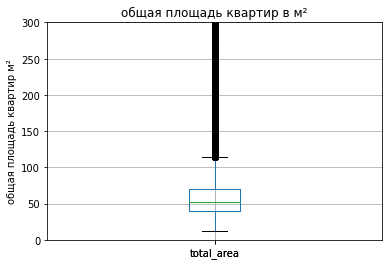

In [79]:
plt.ylim(0, 300)
data.boxplot(column='total_area').set_title('общая площадь квартир в м²')
data.boxplot(column='total_area').set_ylabel('общая площадь квартир м²')
data['total_area'].describe()

Пропусков в значениях нет. `min` значение 12, максимальное `max` 900, среднее `mean` 60.348651, медианное `median` значение 52. Для проведения исследования, логично будет рассматривать срез данных с квартирами площадью от 25 до 150 квадратных метра.

Для того чтобы удостовериться в коректности данных, проверим объекты с анамальными значениями прощади, стоимости и т.д.

In [9]:
display(data.query('last_price == 7.630000e+08 or total_area == 900 or living_area == 409.7 or rooms == 19'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763000000.0,400.0,2017-09-30T00:00:00,7,NaN,10.0,250.0,10,NaN,...,NaN,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0
14498,6,32250000.0,374.6,2018-06-09T00:00:00,19,NaN,5.0,264.5,2,NaN,...,27.6,NaN,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.8,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


**Вывод:**<br>
Данные анамалие вполне могут быть реальными объявлениями и указанные стоимости и площади квартир не являются ошибочными. Но в из-за молого количества таких данных в дальнейшем исследовании их можно отфильтровать.

#### Изменение типа данных в `first_day_exposition`

Поменяем тип данных в столбце `first_day_exposition` на datetimу  <br>

In [82]:
# меняем тип данных
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format=DATE_FORMAT)
# проверяем работала ли земена
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                    object
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

#### Изучение параметра количество комнат `rooms`

Text(0.5, 1.0, 'количество комнат')

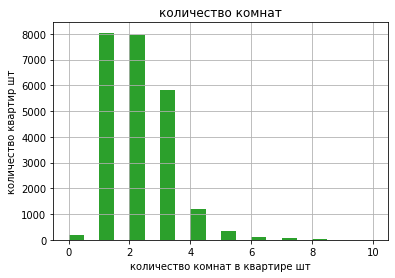

In [83]:
data['rooms'].hist(bins=20, range=(0, 10)).set_xlabel('количество комнат в квартире шт')
data['rooms'].hist(bins=20, range=(0, 10)).set_ylabel('количество квартир шт')
data['rooms'].hist(bins=20, range=(0, 10)).set_title('количество комнат')

In [12]:
print(data[data['rooms'] == 0]['rooms'].count())
print(data[data['rooms'] >= 6]['rooms'].count())

197
195


Основная часть квартир это одно, двух и трехкомнатные, небольшая часть кварит четырех и пяти комнатные. Так же малая часть, менее одного процента, это квартиры с количеством комнат 0, так называемые студии. Что касается квартир с количеством комнат 6 и более, то их тоже небольшое количество самарно равное количеству студий, менее 1 процента.

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

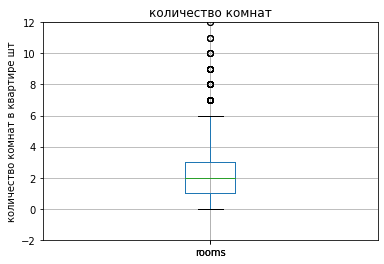

In [84]:
plt.ylim(-2, 12)
data.boxplot(column='rooms').set_title('количество комнат')
data.boxplot(column='rooms').set_ylabel('количество комнат в квартире шт')
data['rooms'].describe()

Минимальное `min` значение = 0, `max` = 19 , среднее `mean` = 2,07, `median` = 2. Данные выглядят вполне логично и правдиво. Среднее и медианное значения очень близки, что говорит о том что гистограмма стремится к нормальному виду распределения. Для ислледования можно взять срез от 0 до 5.

####  Заполнение пропущеных значений `ceiling_height` и изучение параметра высота потолков.

Первый столбец в котором пропущены значения это `ceiling_height` высота потолков. Количество пропущеных значений 9195 значений, это почти 39%, достаточно много. Поэтому нужно заменить пропуски значениями, но помимо пропусков есть ощибочные значения 1м или 100м.  <br>
Сначала просмотрим весь список уникальных значений и определим доли анамальных значений, затем отбросим анамально малые и аномально большие значения, найдем меданное значение и заменим пропуски этим значением. И проверим количество пропусков в столбце.

In [85]:

print('Список отсортированных уникальных значений \n', data['ceiling_height'].sort_values().unique())

print('Квариры с высотой потолка меньше 2.2м {:.2%}'.format(len(data[data['ceiling_height'] < 2.2]) / len(data['ceiling_height'])))
print('Квариры с высотой потолка более 5м {:.2%}'.format(len(data[data['ceiling_height'] > 5]) / len(data['ceiling_height'])))

ceiling_height_median = data[(data['ceiling_height'] > 2.2) & (data['ceiling_height']< 5)]['ceiling_height'].median()

data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median)

print('Количество пропусков после замены', data['ceiling_height'].isna().sum())

Список отсортированных уникальных значений 
 [  1.     1.2    1.75   2.     2.2    2.25   2.3    2.34   2.4    2.45
   2.46   2.47   2.48   2.49   2.5    2.51   2.52   2.53   2.54   2.55
   2.56   2.57   2.58   2.59   2.6    2.61   2.62   2.63   2.64   2.65
   2.66   2.67   2.68   2.69   2.7    2.71   2.72   2.73   2.74   2.75
   2.76   2.77   2.78   2.79   2.8    2.81   2.82   2.83   2.84   2.85
   2.86   2.87   2.88   2.89   2.9    2.91   2.92   2.93   2.94   2.95
   2.96   2.97   2.98   2.99   3.     3.01   3.02   3.03   3.04   3.05
   3.06   3.07   3.08   3.09   3.1    3.11   3.12   3.13   3.14   3.15
   3.16   3.17   3.18   3.2    3.21   3.22   3.23   3.24   3.25   3.26
   3.27   3.28   3.29   3.3    3.31   3.32   3.33   3.34   3.35   3.36
   3.37   3.38   3.39   3.4    3.42   3.43   3.44   3.45   3.46   3.47
   3.48   3.49   3.5    3.51   3.52   3.53   3.54   3.55   3.56   3.57
   3.58   3.59   3.6    3.62   3.63   3.65   3.66   3.67   3.68   3.69
   3.7    3.75   3.76   3.78   3

Text(0.5, 1.0, 'высота потолков')

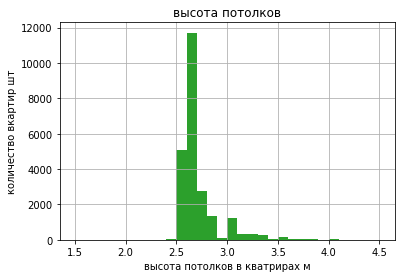

In [87]:
data['ceiling_height'].hist(bins=30, range=(1.5, 4.5)).set_xlabel('высота потолков в кватрирах м')
data['ceiling_height'].hist(bins=30, range=(1.5, 4.5)).set_ylabel('количество вкартир шт')
data['ceiling_height'].hist(bins=30, range=(1.5, 4.5)).set_title('высота потолков')

Основная часть квартир представленных на рынке имеет высоту потолков от 2,5м до 2,8. Самое частое значение 2,65м, это медианное значение, котрым мы заменили пропуски. Так же достаточное количество квартир с высотой потолков от 3 до 3,5 метров, это так называемый старый фонд. 

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

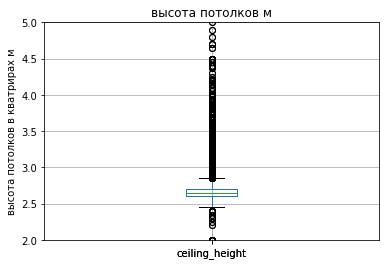

In [88]:
plt.ylim(2, 5)
data.boxplot(column='ceiling_height').set_ylabel('высота потолков в кватрирах м')
data.boxplot(column='ceiling_height').set_title('высота потолков м')
data['ceiling_height'].describe()

В данном анализе гистограмм, выглядит намного информативнее диаграммы размаха. Максимальное значение 100м и минимальное 1м явно указаны ошибочно. Среднее значение 2.771499м и медианное 2.65м достаточно близки, все же среднее больше. Для анализа можно брать значения от 2,5 до 4м.

#### Заполнение пропущеных значений `floors_total`

Далее заменим пропущеные значения в столбце `floors_total` всего этажей в доме. Количество пропущеных значений 86 значений, это 0,36%. <br>
Заменить значения на медианное или среднее нельзя так как оно может быть меньше значения указанного в столбце `floor`.
Для начала можно посмотреть на каком этаже расположены квартибы в строках где есть пропуски `floors_total`. <br>
Полностью удалять строки с пропусками не хочется, поэтому пропуски заменим на +1 значение больше чем этаж расположения квартиры. <br>

In [90]:

print('Список отсортированных уникальных значений \n', data['floors_total'].sort_values().unique())
display(data[data['floors_total'].isna()])

data['floors_total'] = data['floors_total'].fillna(data['floor'] + 1)

print('Количество пропусков после замены', data['floors_total'].isna().sum())

data['floors_total'] = data['floors_total'].astype(int)


Список отсортированных уникальных значений 
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 33 34 35 36 37 52 60]


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Количество пропусков после замены 0


#### Изучение параметра жилая площадь `living_area`

In [18]:
print('-living_area', 'количество пропусков:',data['living_area'].isna().sum(), 'это {:.2%}'.format(data['living_area'].isna().mean()))
print(data['living_area'].sort_values().unique())


-living_area количество пропусков: 1903 это 8.03%
[  2.    3.    5.  ... 409.  409.7   nan]


<AxesSubplot:>

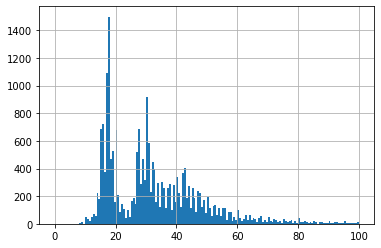

In [19]:
data['living_area'].hist(bins=160, range=(0, 100))

На гистограмме жилой площади, явно не нормальное распределение. На гистограмме два пика, один большой провал и длинный шлейф в сторону увеличения значений жилой площади. На значениях от 10 до 18 квадратных метров количество квартир резко увеличивается, от 18 до 24 квадратных метров количество квартир резко уменьшается, а  от 25 до 30 снова резко увеличивается. Затем от 30 до 60 квадратных метров идет плавное снижение количества, с небольшими скачками. За значением 60 квадратных метров тянется шлейф из больших но малочисленных значений. Такое распределение говорит о том что в данных есть пропуски на месте провала и выбросы в пиковых значениях.

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

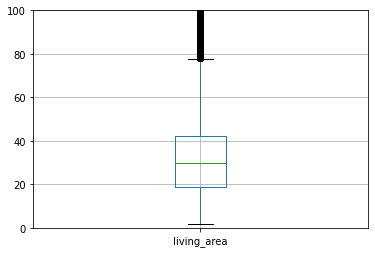

In [20]:
plt.ylim(0, 100)
data.boxplot(column='living_area')
data['living_area'].describe()

Диаграмма размаха и метод describe() показывают что min значение 2 квадратных метра, явно ошибочное, max значение 406 квадратных метров может быть правдой если это значение соответствует объекту с общей площадью 900 квадратных метров. Среднее 34.457852 и медианное 30 значение достаточно близки друг к другу. Для аналиса можно взять срез от 12 до 60 квадратных метра.

#### Заполнение пропущеных значений `floor`

<AxesSubplot:>

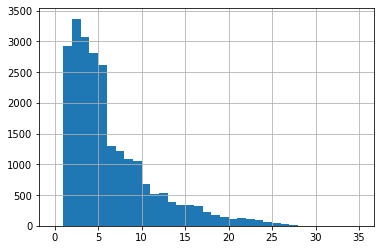

In [21]:
data['floor'].hist(bins=35, range=(0, 35))

Судя по гистограмме больше всего квартир продается на этажах с первого по пятый этаж, это самые популярные этажи, так как в городах много пятиэтажных домов, а в многоэтажных с первого по пятый этаж тоже емеются. Первых этажей представленно меньше чем вторых скорее всего из-за того что это не самое любимое расположение среди покупателей, да и часто в домах на первом этаже располагаются коммерческие помещения. С увеличением номера этажа количество предложений уменьшается, так как и количество самих домов высотой более 20 этажей не много.

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

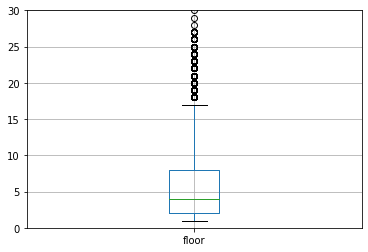

In [22]:
plt.ylim(0, 30)
data.boxplot(column='floor')
data['floor'].describe()

Минимальное min значение 1, а max значение 33. Среднее почти 6, это на 1 больше медианного значения, равного 5 значение достаточно близки друг к другу, среднее все таки склоняется в бльшую сторону что говорит о "росте" города в вывоту. А данные выглядят очень правдоподобно.

#### Изучение типов этажей квартиры («первый», «последний», «другой»)

<AxesSubplot:>

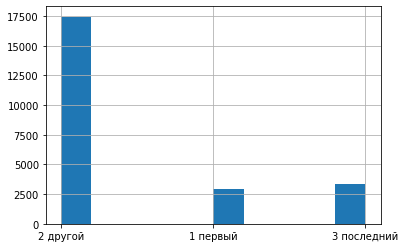

In [69]:
data['floor_category'].hist()

На гистограмме все логично. Првых и последних этажей немного, так как их в кождом доме максимум по одному, а между ними куча этажей категории другие. Количество первых этажей меньше чем последних из-за того что на первых этажах часто располагают коммерческие помещения.

#### Изучение праметра общее количество этажей в доме

<AxesSubplot:>

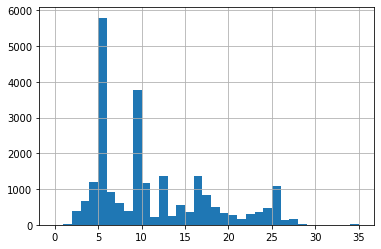

In [70]:
data['floors_total'].hist(bins=35, range=(0, 35))

Гистограмм этажности домов, очень не однородная, состоящая из нескольких пиков. Плавный подъем от 1 до 4, это дома старого фонда в городах, и малоэтажные дома в недольших поселках. Первый, самый большой пик это пятиэтажные дома, которых большинство в городах больших, малых и поселках по всей Лененградской области. Второй пик это девяти этажные дома, построенные в большом количестве в Санкт-Петербурге и городах поменьше, с конца шестидесятых до начала восмидесятых годов. Два пика поменьше это дома 12 и 16 этажей которые начали строить в восмидесятых годах и строят до сих пор в Санкт-Петербурге. И высокое значение в 25 этажей это новые дома, построеные в последние годы в близлежащих к городу поселках.

count    23699.000000
mean        10.675092
std          6.595719
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

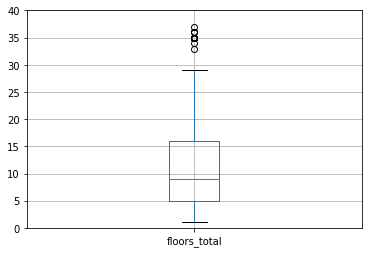

In [71]:
plt.ylim(0, 40)
data.boxplot(column='floors_total')
data['floors_total'].describe()

`min` значение 1, максимальное `max` значение 60, среднее `mean` значение 10.673824, медианное `median` значение 9. Максимальное значение 60, скорее всего указано ошибочно, так как по данным сети интернет самый высокий жилой дом в Санкт-Петербурге всего 37 этажей. Медианное значение меньше среднего, что говорит о том что хоть город и растет в высоту, большинство домов в 9 этажей.

#### Заполнение пропущеных значений `is_apartment`

Пропуски в данном столбце образовались скорее всего из-за того что при заполнении формы этот пунк игнорировался, потому что доля апартаментов среди жилых объектов очень мала. Поменяем пропуск в столбце на значение False.


In [72]:
# Поменяли пропуски на False
data['is_apartment'] = data['is_apartment'].fillna(False)


#### Изучение параметра площадь кухни `kitchen_area`

<AxesSubplot:>

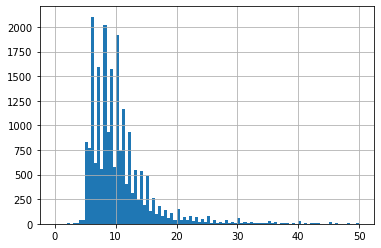

In [73]:
data['kitchen_area'].hist(bins=100, range=(0, 50))

В отличии от гистограммы жилой площади, гистограмма площади кухни выглядит лучше и инеет вид распределения Пуассона. Резкое увеличение количества квартир начинается с отметки 5 метров квадратных. Основное количество квартир имеет площадь кухни в пределах от 5 до 12 квадратных метров. Количество квартир с площадью кухни от 12 до 20 квадратных метров плавно уменьшается, а квртиры с площадью кухни более 30 квадратных метров становятся редкостью.

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

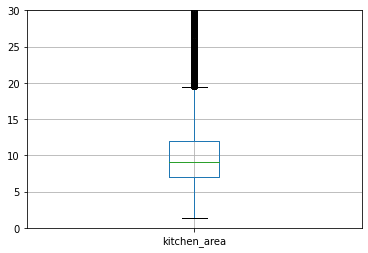

In [65]:
plt.ylim(0, 30)
data.boxplot(column='kitchen_area')
data['kitchen_area'].describe()

`min` значение 1,3м², максимальное `max` 112м², среднее `mean` 10.569807м², медианное `median` значение 9,1м². Среднее значение заметно отклоняется от медианного в сторону увеличения из-за нескольких больших значений в списке. Минимальное значение 1,3м², выглядит неправдоподобно, но судя по гистограмме, зачений менее 5м² незначительное количество. Для исследования удобно будет рассматривать срез данных от 5 до 20 квадратных метров.

#### Заполнение пропущеных значений `balcony`

Пропуски в столбце `balcony` скорее всего появились по пречине того, что при заполнении формы этот пункт прпускали в по причине отсутствия балкона, поэтому заменим пропущеные значения на `0` и поменяем тип значений столбца.

In [74]:
# заменим пропущеные значения на 0 
data['balcony'] = data['balcony'].fillna(0)
# поменяем тип данных
data['balcony'] = data['balcony'].astype('int')
# Проверим количество пропусков
print('Количество пропусков после замены', data['balcony'].isna().sum())

Количество пропусков после замены 0


#### Заполнение пропущеных значений `locality_name`

Так как количество пропусков в столбце не значительное 0,21%, просто удалим пропущеные значения.
Просмотрев список уникальных значений, становится понятно, что в столбце присутствуют неявные дубликаты, которые отличаются левой частью названия 'посёлок' / 'поселок' или 'посёлок городского типа' / 'городской поселок', можно убрать левую часть названия.

In [1]:
data['locality_name'] = (data['locality_name'].split())

NameError: name 'data' is not defined

In [75]:
# Удаляем пропуски
data = data.dropna(subset=['locality_name'])
# Проверяем количество пропущеных значений после удаления
print(data['locality_name'].isna().sum())
# Убираем левую часть названия
subwords = ['поселок', 'посёлок', 'городского', 'городской', 'типа', 'село', 'деревня', 'садовое', 'товарищество', 'коттеджный', 'станции']
pat = '|'.join(subwords)
data['locality_name'] = (data['locality_name'].replace(pat,'', regex=True).str.strip())
# Выведим список уникальных значений столбца отсортированный по алфавиту
print('Список отсортированных уникальных значений \n', data['locality_name'].sort_values().unique())


0
Список отсортированных уникальных значений 
 ['Агалатово' 'Александровская' 'Алексеевка' 'Аннино' 'Аро' 'Барышево'
 'Батово' 'Бегуницы' 'Белогорка' 'Белоостров' 'Бокситогорск'
 'Большая Вруда' 'Большая Ижора' 'Большая Пустомержа' 'Большие Колпаны'
 'Большое Рейзино' 'Большой Сабск' 'Бор' 'Борисова Грива' 'Бугры'
 'Будогощь' 'Ваганово' 'Важины' 'Вартемяги' 'Вахнова Кара' 'Вещево'
 'Виллози' 'Вознесенье' 'Возрождение' 'Войсковицы' 'Войскорово'
 'Володарское' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Вырица'
 'Выскатка' 'Высокоключевой' 'Высоцк' 'Гаврилово' 'Гарболово' 'Гатчина'
 'Гладкое' 'Глажево' 'Глебычево' 'Глинка' 'Гончарово' 'Горбунки'
 'Гостилицы' 'Громово' 'Дзержинского' 'Дружная Горка' 'Дружноселье'
 'Дубровка' 'Елизаветино' 'Ефимовский' 'Жил' 'Жилгородок' 'Житково'
 'Заводской' 'Заклинье' 'Заневка' 'Запорожское' 'Зеленогорск' 'Зимитицы'
 'Ивангород' 'Извара' 'Ильичёво' 'Иссад' 'Калитино' 'Каложицы' 'Кальтино'
 'Каменногорск' 'Камышовка' 'Каськово' 'Келози' 'Кивеннапа Север'


/tmp/ipykernel_48/2564484869.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['locality_name'] = (data['locality_name'].replace(pat,'', regex=True).str.strip())


#### Изучение параметра расстояние до центра города

<AxesSubplot:>

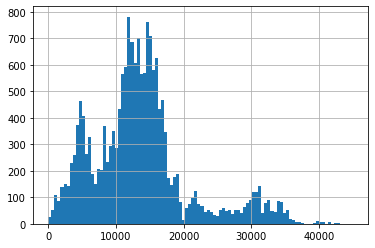

In [76]:
data['cityCenters_nearest'].hist(bins=100, range=(0, 45000))

Гистограмма близости объетов недвижимости к центру города достаточно неоднородная. Первый подем от 0 до 5000 метров это центор города, в котором всегда достаточно много предложений, далее следует провал от 5000м до 8000м это участки города которые много лет назад считались промышленными районами, в которых на данный момент располагаются стрые промышленые здания, которые в настоящее время переделывают в комерческую недвижимость и редко на этих местах сторят жилые дома. Далее в промежутке на рассоянии от центра от 8000м до 20км располагается большая часть жилой недвижимости, это старые и новые так называемые спальные районы, активно застраиваемые во все времена. Далее гистограмма имеет волнообразный вид с жилыми домами на расстоянии от центра 22 и 30км, это близлежащие к Санкт-Петербургу поселки.

count    18139.000000
mean     14197.860742
std       8606.830295
min        181.000000
25%       9241.000000
50%      13105.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

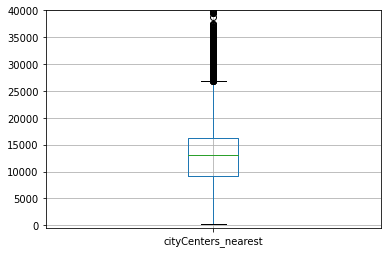

In [77]:
plt.ylim(-500, 40000)
data.boxplot(column='cityCenters_nearest')
data['cityCenters_nearest'].describe()

`min` значение 181м, максимальное `max` 65968м, среднее `mean` 14191.277833м и медианное `median` значение 13098.50м. Данные выглядит вполне правдоподобно. 

#### Изучение параметра расстояние до ближайшего аэропорта

<AxesSubplot:>

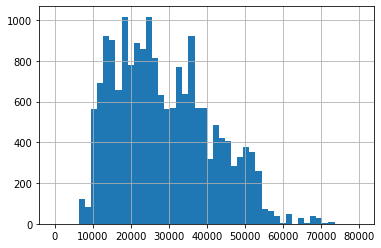

In [78]:
data['airports_nearest'].hist(bins=50, range=(0, 80000))

На гистограмме близости к аэропорту видно что аэропорт находится достаточно близко к городу, ближайшие жилые дома находятся на ратоянии чуть больше 5км, а на растоянии 10км начинается большой жилой масив. С отдалением от аэропорта уменьшается и количество жилых домов. 

count    18116.000000
mean     28803.225878
std      12637.314144
min          0.000000
25%      18575.750000
50%      26756.500000
75%      37294.000000
max      84869.000000
Name: airports_nearest, dtype: float64

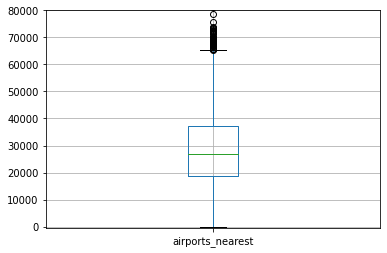

In [79]:
plt.ylim(-500, 80000)
data.boxplot(column='airports_nearest')
data['airports_nearest'].describe()

`min` значение 0, максимальное `max` 84869, среднее `mean` 28793.672193 и медианное `median` значение 26726.0. Минимальное значение не может быть нулевым, это явно ошибочное значение.

#### Изучение параметра расстояние до ближайшего парка

<AxesSubplot:>

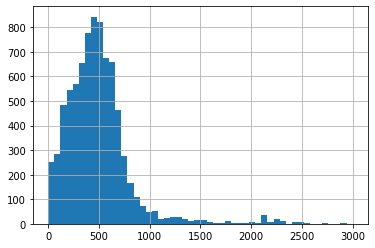

In [80]:
data['parks_nearest'].hist(bins=50, range=(0, 3000))

Судя по гистограмме практически возле каждого дома в Санкт-Петербурге и области находится парк на расстоянии от 1 до 1000 метров. 

count    8064.000000
mean      490.830729
std       342.554386
min         1.000000
25%       288.000000
50%       454.500000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

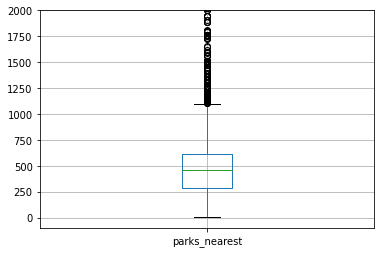

In [81]:
plt.ylim(-100, 2000)
data.boxplot(column='parks_nearest')
data['parks_nearest'].describe()

`min` значение 1м, максимальное `max` 3190м. Данные выглядят вполне правдоподобно, среднее и медианное значения достаточно близки по значению, что говорит о незначительном количестве больших значений.

#### Изучение параметра день, месяц размещения объявления

<AxesSubplot:>

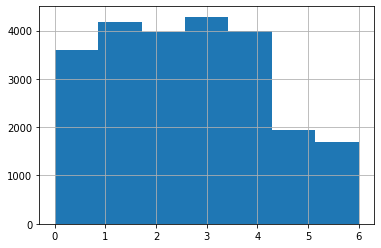

In [82]:
data['exposition_weekday'].hist(bins=7, range=(0, 6))

На гистограме размещения объявлений по дням все выглядит вполне логично. В понедельник люди включаются в работу, кто-то быстрее, кто-то медленее, поэтому количество объявлений в понедельник меньше чем в остальные рабочие дни, со вторника по пятницу количество подаваемых объявлений +/- одинаковое, а в субботу и в воскресенье люди предпочитают в большей части отдыхать.

### Посчитайте и добавьте в таблицу новые столбцы

#### Цена одного квадратного метра

In [98]:
# Добавляем столбец price_one_meter - отношение общей стоимости к общей площади и округляем до 2х значений
data['price_one_meter'] = round(data['last_price'] / data['total_area'], 2)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,exposition_month,exposition_weekday,price_one_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,3,3,120370.37
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,NaN,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,12,1,82920.79
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,NaN,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,8,3,92785.71
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,NaN,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,7,4,408176.10
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,6,1,100000.00


#### День публикации объявления

In [97]:
# Добавили столбец с номерами дней недели 0-понедельник 6-воскресенье
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,exposition_month,exposition_weekday
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,3,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,NaN,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,12,1
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,NaN,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,8,3
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,NaN,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,7,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,6,1


#### Месяц публикации объявления

In [96]:
# Добавили столбец с номерами месяцев 1-январь 12-декабрь
data['exposition_month'] = data['first_day_exposition'].dt.month
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,exposition_month
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,12
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,8
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,6


#### Год публикации объявления

In [99]:
# Добавили столбец с годом 
data['exposition_year'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,exposition_month,exposition_weekday,price_one_meter,exposition_year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,16028.0,1.0,482.0,2.0,755.0,NaN,3,3,120370.37,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,NaN,...,18603.0,0.0,NaN,0.0,NaN,81.0,12,1,82920.79,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,NaN,...,13933.0,1.0,90.0,2.0,574.0,558.0,8,3,92785.71,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,NaN,...,6800.0,2.0,84.0,3.0,234.0,424.0,7,4,408176.10,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,8098.0,2.0,112.0,1.0,48.0,121.0,6,1,100000.00,2018


#### Добавление категории расположения квариры

Добавим столдец с указанием категории расположения квартиры на этаже "первый", "последний", "другой"

In [100]:
# Создали функцию
# В функцию вложили условия
def floor_category (row):
    floor = row['floor']
    top_floor = row['floors_total']
    
    if floor == 1:
        return '1 первый'
    
    if floor == top_floor:
        return '3 последний'
    
    return '2 другой'

# Добавили столбец методом apply и применили его ко всем сторокам
data ['floor_category'] = data.apply(floor_category, axis = 1)
# Проверели добавленый столбец
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,exposition_month,exposition_weekday,price_one_meter,exposition_year,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,1.0,482.0,2.0,755.0,NaN,3,3,120370.37,2019,2 другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,NaN,...,0.0,NaN,0.0,NaN,81.0,12,1,82920.79,2018,1 первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,NaN,...,1.0,90.0,2.0,574.0,558.0,8,3,92785.71,2015,2 другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,NaN,...,2.0,84.0,3.0,234.0,424.0,7,4,408176.10,2015,2 другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,2.0,112.0,1.0,48.0,121.0,6,1,100000.00,2018,2 другой


#### Добавление расстояния до центра города в км

In [101]:
# Добавляем столбец с растояниеми до центра города в км и округляем до 2х значений
data['cityCenters_km'] = round(data['cityCenters_nearest'] / 1000, 2)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,exposition_month,exposition_weekday,price_one_meter,exposition_year,floor_category,cityCenters_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,482.0,2.0,755.0,NaN,3,3,120370.37,2019,2 другой,16.03
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,NaN,...,NaN,0.0,NaN,81.0,12,1,82920.79,2018,1 первый,18.60
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,NaN,...,90.0,2.0,574.0,558.0,8,3,92785.71,2015,2 другой,13.93
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,NaN,...,84.0,3.0,234.0,424.0,7,4,408176.10,2015,2 другой,6.80
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,112.0,1.0,48.0,121.0,6,1,100000.00,2018,2 другой,8.10


### Проведите исследовательский анализ данных

#### Как быстро продавались квартиры?

Столбец `days_exposition` содержит информацию о том сколько дней объявление было представлено на сайте. 

<AxesSubplot:>

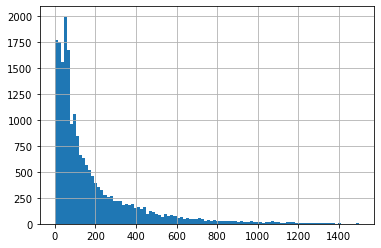

In [30]:
data['days_exposition'].hist(bins=100, range=(0, 1500))

*Вывод:* <br>
Большая часть квартир продается по времени от 1 до 100 дней, это хорошие варианты квартир, которые продаются быстро. Есть на графике и пиковые значения, то есть рекордное количество кваритр было продано на сороковой, шестидесятый и девяностый дни. Могу предположить что это какие-то пороговые значения размещения объявления. Например продавец подает бесплатное объявление или по сниженой стоимости, а по истечению 40, 60, 90, дней, если не бало оплаты, то объявление снимается с продажи. На промежутке от 100 до 350 дней идет заметное снижение количества объявлений, а за отметкой 400 дней тянется длинный шлейф малочисленных объявлений с вариантами похуже или не выгодными.

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

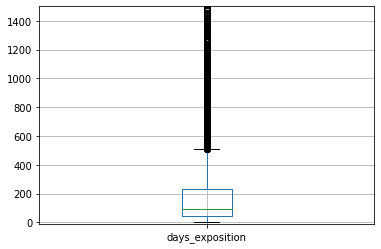

In [31]:
plt.ylim(-10, 1500)
data.boxplot(column='days_exposition')
data['days_exposition'].describe()

*Вывод:* <br>
Ранее мы уже просматривали значения в столбце `days_exposition` сколько дней было размещено объявление (от публикации до снятия). И знаем что: `min` значение 1 день (бывает и такое), если на рынке появляется выгодное предложение, то покупатели находятся за один день, а затем объявление снимают, что бы потенциальные покупатели больше не звонили. Но чаще продажа квартиры занимает чуть больше трех месяцев или даже полгода, именно на этих отметках находятся медианное `median` значение 95 дней и среднее `mean` 181 день. Разница между этими значениями большая, среднее значение почти в два раза больше медианного, это связано с тем что в значениях присутствует не мало долгих обявлений, которые находятся в публикации более трех лет. Именно эти долгие продажи квартир и увеличивают среднее значение. А максимальное `max` значение 1580 дней — это более 4 лет, обычно это не самые хорошие или выгодные пердложения и если продавец не торопится с продажей, то такие объявления могут еще долгое время располагаться на сайте. Значения в столбце `days_exposition` могут являться показателем того на сколько объект хорош или на сколько данное предложение выгодное для покупателя.

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта

Стоимость обекта складывается из перечня факторов. которые в той или иной степени, вместе или по отдельности влияют на конечную стоимость объекта. Провем как ряд факторов влеяет на стоимоть объекта недвижимости.

##### Проверяем замвисимость стоимомотси квартиры от ее общей площади.

Составим сводную таблицу. Сгруппируем объекты по площади и посмотрим на стоимость квартир по квартир по каждой группе. Для начала сравним среднюю и медианную стоимость каждой группы квартир. Затем построим графики на основании данных сводных таблиц с применением разных функций. Так же определим коэффициет корреляции Пирсона. 

,last_price
total_area,
12.0,2400000.0
13.0,2350000.0
13.2,1686000.0
14.0,1190000.0
15.0,1725000.0
...,...
590.0,65000000.0
618.0,300000000.0
631.0,140000000.0


,last_price
total_area,
12.0,2400000.0
13.0,1850000.0
13.2,1686000.0
14.0,1190000.0
15.0,1725000.0
...,...
590.0,65000000.0
618.0,300000000.0
631.0,140000000.0


0.6537407142641289


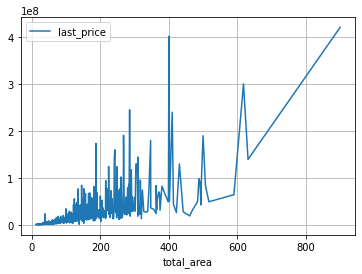

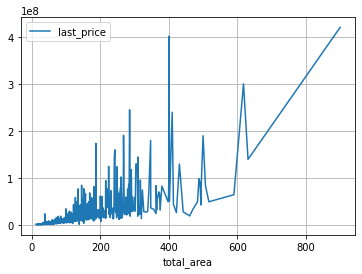

In [32]:
#Сравним числовые значения
display(data.pivot_table(index='total_area', values='last_price', aggfunc='mean'))
display(data.pivot_table(index='total_area', values='last_price', aggfunc='median'))
#И посмотрим на графики
data.pivot_table(index='total_area', values='last_price', aggfunc='mean').plot(grid=True)
data.pivot_table(index='total_area', values='last_price', aggfunc='median').plot(grid=True)
#Определяем коэффициет корреляции Пирсона
print(data['total_area'].corr(data['last_price']))

Медианные и средние значения каждой группы в большей части совпадают, но думаю в дальнейших исследованиях будет лучше рассматривать медианные значения.<br>
На графиках виден рост стоимости от увеличения площади объекта, но рост очень неоднородный, с частыми колебаниями и большими амплитудами колебаний. <br>
Коэффициет корреляци равен 0,65 это говорит о том что связь площади обекта и его стоимостю присутствует, но связь не сильная. Стоимость в зависимости от увеличения площади обекта растет, но не всегда объекты с большой площадью будут пропорционально дороже.<br>
Что если для исследования отфильтравать малочисленные объекты с большими значениями?<br>
Как ранее я упомена что для исследования можно отфильтровать некоторые значения. Так например по общей площади можно отбосить объекты с площадью более 150 квадратных метров, а по стоимости оставить обекты стоимостью до 18млн. рублей.

0.7559658891177813


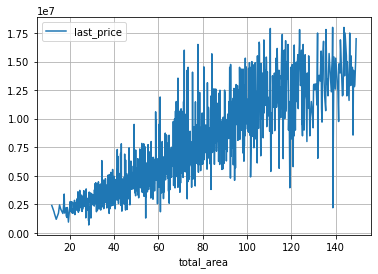

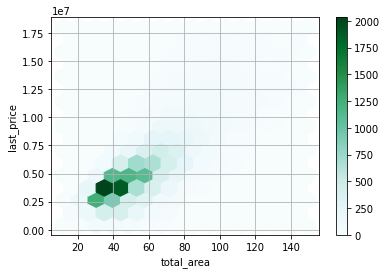

In [33]:
# Составляем сводную таблицу по отфильтрованным данным и стороми график
# Естественно придерживаемся принципа "Бритва Оккама"
(
    data.query('total_area < 150 and last_price < 18000000')
    .pivot_table(index='total_area', values='last_price', aggfunc='median')
    .plot(grid=True)
)
# Попробуем построить график с ячейками
(
    data.query('total_area < 150 and last_price < 18000000')
    .plot(x='total_area', y='last_price', kind='hexbin', gridsize=15, grid=True, sharex=False)
)
# Проверяем коэффициет корреляции Пирсона для отфильтрованых данных
print(data[data['total_area'] < 150]['total_area'].corr(data[data['last_price'] < 18e+06]['last_price']))


К сожалению график с ячейками получается не очень информативный. <br>
Но простой график стал значительно ровнее и зависимость стоимости объекта от его общей площади стала более явной.<br>
И коэффициент корреляции вырос до 0,75 что тоже свидетельствует об увелечении зависимости.<br><br>
*Вывод:*<br>
Зависимость стоимости обекта от его площади несомненно присутсвует и на тепичных и частоых значениях зависимоть выше и прослеживается более четко. Но при наличии нетепичных значений (выбивающихся из общего ряда), например с редкими но большими площадями и вы сокими ценами, связь двух этих параметров ослабевает. Это можно обяснить тем что обекты с большой площадью, встречаются реже, разница значений площади больше и на конечную цену начинают сильно влиять другие факторы, Например расположение, количество комнат, ремонт и т.д.

##### Проверяем замвисимость стоимомоти квартиры от ее жилой площади.

Постороим график зависимости жилой площади к стоимости объекта, сгрупировав квартиры по жилой площади и вычислив медианные значения стоимости.

0.5664868713031547


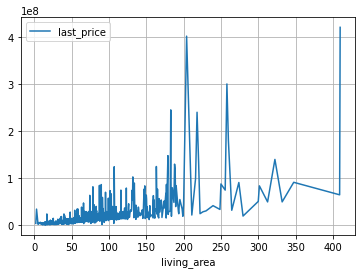

In [34]:
#Строим график по сводной таблице.
data.pivot_table(index='living_area', values='last_price', aggfunc='median').plot(grid=True)
#Определяем коэффициет корреляции Пирсона
print(data['living_area'].corr(data['last_price']))

График зависимости стоимости к жилой площади получается еще более неоднородный чем гафик звисимости стоимости к общей площади. Амплитуда значений еще больше. А кооэффициент корреляции меньше.<br>
Рассмотрим график и коэффициент для типичных, наиболее частых значений. Так для жилой площади возьмем данные от 10 до 60 квадратных метров, а для стоимости объектов до 18 млн. руб.

0.5462145903205678


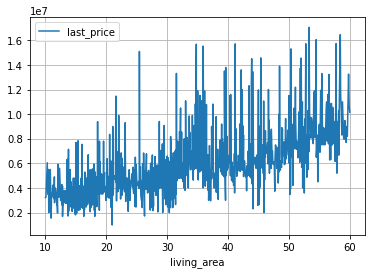

In [35]:
# Составляем сводную таблицу по отфильтрованным данным и стороми график
(
    data.query('living_area >= 10 and living_area <= 60  and last_price < 18000000')
    .pivot_table(index='living_area', values='last_price', aggfunc='median')
    .plot(grid=True)
)

# Проверяем коэффициет корреляции Пирсона для отфильтрованых данных
print(
    data[((data['living_area'] >= 10)&(data['living_area']<=60))]['living_area']
    .corr(data[data['last_price'] < 18e+06]['last_price'])
)

Фильтрация значений не улучшила показатели. На графике стали заметнее более частые колебания и график стал более волнистый с большой смлитудой, так стоимость некоторых обектов с одинаковой жилой площадью может коллебаться от 2-х до 15 млн. рублей. Коэввициент корреляции так же говорит о том что связь присутствует но небольшая.<br><br>
*Вывод:*<br>
Да действительно жилая площадь сама по себе не сильно влияет на стоимость жилья и на стоимость объектов с одинаковой жилой площадью влияют другие факторы, например общая площать, площадь кухни или количество комнат.

##### Проверяем замвисимость стоимомоти квартиры от ее площади кухни.

Постороим график зависимости площади кухни к стоимости объекта, сгрупировав квартиры по жилой площади и вычислив медианные значения стоимости.

0.5201666399417335


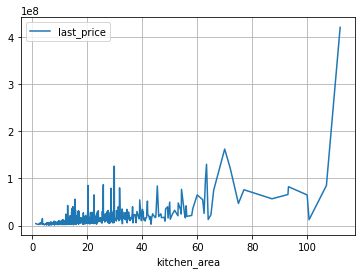

In [36]:
#Строим график по сводной таблице.
data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median').plot(grid=True)
#Определяем коэффициет корреляции Пирсона
print(data['kitchen_area'].corr(data['last_price']))

График зависимости стоимости к площади кухни получается на столько же неоднородный как и гафик звисимости стоимости к жилой площади. Амплитуда значений достаточно большая. Увеличение стоимости от увеличения площади кухни, визуально не большое, только при площади кухни более 100 кв.метров видно резкое увеличение стоимости. И кооэффициент корреляции 0,52.<br>
Рассмотрим график и коэффициент для типичных, наиболее частых значений. Так для площади кухни возьмем данные от 5 до 20 квадратных метров, а для стоимости объектов так же оставим 18 млн. руб.

0.4492740212586962


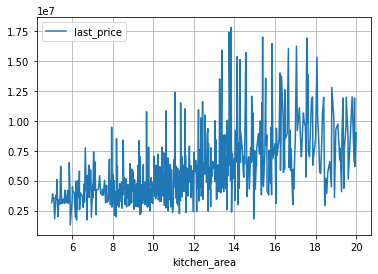

In [37]:
# Составляем сводную таблицу по отфильтрованным данным и стороми график
(
    data.query('kitchen_area >= 5 and kitchen_area <= 20 and last_price < 18000000')
    .pivot_table(index='kitchen_area', values='last_price', aggfunc='median')
    .plot(grid=True)
)

# Проверяем коэффициет корреляции Пирсона для отфильтрованых данных
print(
    data[((data['kitchen_area'] >= 5)&(data['kitchen_area']<=20))]['kitchen_area']
    .corr(data[data['kitchen_area'] < 18e+06]['last_price'])
)

После того как отфильтровали нетипичные значения на графике стали видны очень частые и большие колебания стоимости. Судя по графику кватриры с одинаковой площадью кухни могут стоить от 2,5 до 17,5 млн.рублей. Коэввициент корреляции показывает что на тепичных не больших и частых значениях зависимость стоимости от площади кухни ниже чем при больших и редких значениях.<br><br>
*Вывод:*<br>
Судя по графику и коэррициенту, большая площадь кухни это не основной критерий формирования стоимости объекта, а скорее приятный бонус. Значит на стоимость объектов с одинаковой площадью кухни влияют и другие факторы, например общая площать и количество комнат.

##### Проверяем замвисимость стоимомоти квартиры от количества комнат.

0.36334045253748376


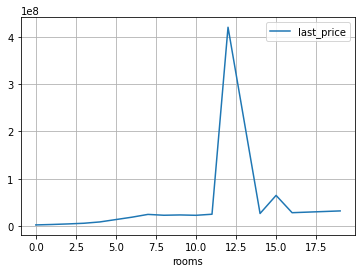

In [38]:
#Строим график по сводной таблице.
data.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(grid=True)
#Определяем коэффициет корреляции Пирсона
print(data['rooms'].corr(data['last_price']))

Сначала на графике прослеживаетсяплавное увеличение стоимости от увеличения числа комнат. Ветем виден резкий скачек стоимости на 12-ти комнатной квартире и затем резкое падение стоимости на 13-ти комнатной квартире. В данном случае пиковое значение это анамальное значение. Построим график по отфильтрованным данным, для количества комнат оставим значения от 0 до 6, а значение стоимости квартиры 20мл. рублей.

0.5030263999191305


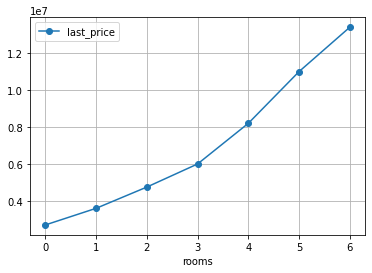

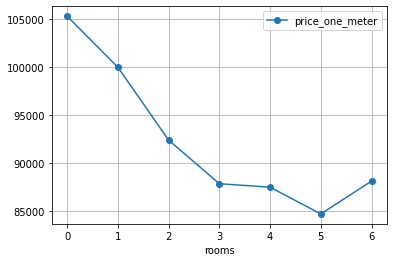

In [111]:
# Составляем сводную таблицу по отфильтрованным данным и стороми график
(
    data.query('rooms <= 6 and last_price < 20000000')
    .pivot_table(index='rooms', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-')
)
(
    data.query('rooms <= 6 and last_price < 20000000')
    .pivot_table(index='rooms', values='price_one_meter', aggfunc='median')
    .plot(grid=True, style='o-')
)
# Проверяем коэффициет корреляции Пирсона для отфильтрованых данных
print(data[data['rooms'] <= 6]['rooms'].corr(data[data['last_price'] < 20e+06]['last_price']))

*Вывод:* <br>
На графике явно прослеживается зависимость роста стоимости от увеличения количества комнат в квартире. Но коэффициент корреляции не высок, возможно из-за того что рост стоимости квартиры не всегда означает увеличение количества комнат в квартире.<br>
При увеличении количества комнат увеличивается и площадь квартиры, но судя по графику цена одного квадратного метра при увелечении количества комнат снижается, а значит выгоднее покупать квартиры с большим количеством комнат.

##### Проверяем замвисимость стоимомоти квартиры от типа этажа, на котором расположена квартира (первый, последний, другой).

<AxesSubplot:xlabel='floor_category'>

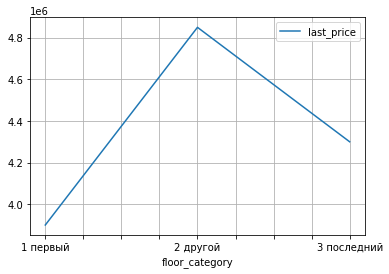

In [40]:
#Строим график по сводной таблице.
data.pivot_table(index='floor_category', values='last_price', aggfunc='median').plot(grid=True)


*Вывод:*<br>
Судя по графику самая низкая средняя стоимость объектов на первом этаже, далее чуть выше стоимость у объектов на последнем этаже и самая высокая стоимость у квартир на этажах категории "другие". Просто так исторически сложилось, первый этаж самый проходной, самый не безопасный, так же из-за низкого расположения в окна попадает больше пыли, из-за подобных факторов стоимость значительно снижается. На последних этажах летом бывает жарче, из-за того что крыша нагревается, а в случае если протечет крыша, то испотрится дорогостоящий ремонт, но у квартир на последних этажах есть и плюсы, нет соседей сверху, поэтому стоимость квартир на последнем этаже средняя. Высокая средняя стоимость категории этажа "другой" Объясняется тем что это не первый и не последний этаж. 

##### Проверяем замвисимость стоимомоти квартиры от даты размещения (день недели, месяц, год).

Построим три графика зависимости стоимости объектов от размещения объявления в определенный день, месяц или год.

- День

<AxesSubplot:xlabel='exposition_weekday'>

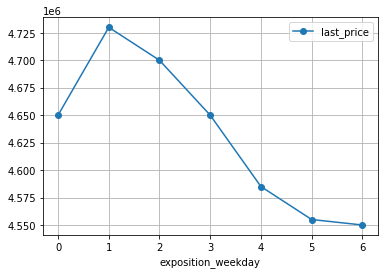

In [41]:
#Группируем данные по дням недели от 0 до 6 
#и считаем медианное значение стоимости объекта опубликованного в определенный день недели.
data.pivot_table(index='exposition_weekday', values='last_price', aggfunc='median').plot(grid=True, style='o-')

- Месяц

<AxesSubplot:xlabel='exposition_month'>

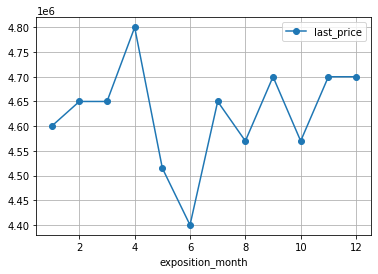

In [42]:
#Группируем данные по месяцам от 1 до 12 
#и считаем медианное значение стоимости объекта опубликованного в каждом месяце.
data.pivot_table(index='exposition_month', values='last_price', aggfunc='median').plot(grid=True, style='o-')

- Год

<AxesSubplot:xlabel='exposition_year'>

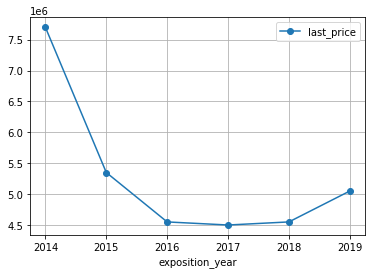

In [43]:
#Группируем данные по годам от 2014 до 2019 
#и считаем медианное значение стоимости объекта в каждом году.
data.pivot_table(index='exposition_year', values='last_price', aggfunc='median').plot(grid=True, style='o-')

*Из имеющихся данных мы понимаем что, в 2014 и 2019 годах, процент данных от общего количества данных, был меньше по сравнению с годами от 2015 до 2018 года, так как данные в 2014 и 2019 годах, были взяты не за весь год, а нескольско месяцев. Поэтому на графике присутствуют явные снижения и увеличения. Если бы данные за 2014 и 2019 года были представлены в полном объеме, то возможно снижение стоимости в 2014 году было бы более плавное, а может и сохранилось бы в данном виде. Можно конечно проверить как стоимость квартир изменялась в по месяцам в течении каждого года, как показано на графиках ниже или отфильтровать данные за 2014 и 2019 года. Так или иначе в конкретном, нашем случае, с 2015 по 2017 год наблюдается снижение стоимости квартир, а с 2018 рост.*

<AxesSubplot:xlabel='exposition_year'>

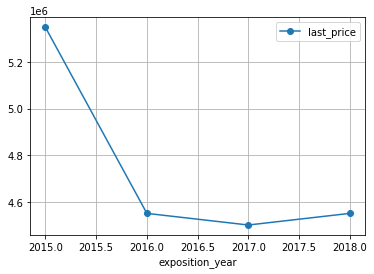

In [121]:
(
    data.query('exposition_year > 2014 and exposition_year < 2019')
    .pivot_table(index='exposition_year', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-')
)

<AxesSubplot:xlabel='exposition_month'>

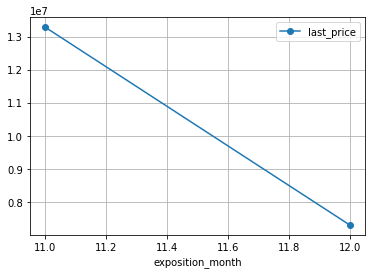

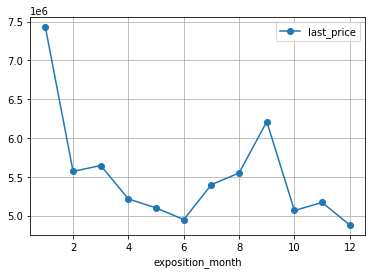

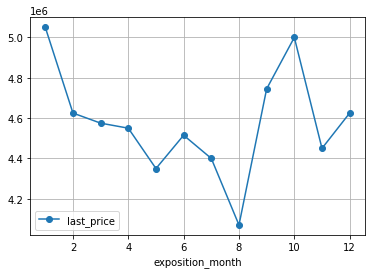

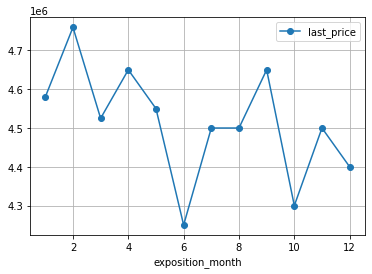

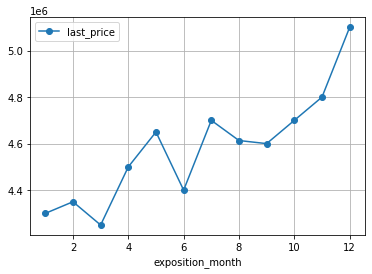

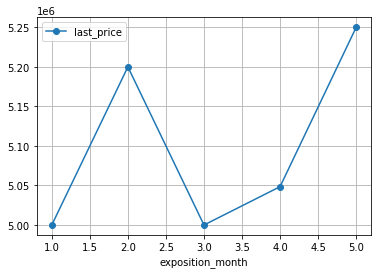

In [119]:
(
    data.query('exposition_year == 2014')
    .pivot_table(index='exposition_month', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-')
)
(
    data.query('exposition_year == 2015')
    .pivot_table(index='exposition_month', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-')
)
(
    data.query('exposition_year == 2016')
    .pivot_table(index='exposition_month', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-')
)
(
    data.query('exposition_year == 2017')
    .pivot_table(index='exposition_month', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-')
)
(
    data.query('exposition_year == 2018')
    .pivot_table(index='exposition_month', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-')
)
(
    data.query('exposition_year == 2019')
    .pivot_table(index='exposition_month', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-')
)

*Вывод:*<br>
График стоимости бъектов недвижимости по годам показывет что с 2014 по 2015 год произошло стремительное снижение стоимости, и после 2015 года продолжилось плавное снижение стоимости. Поковым оказался 2017 год с самой низкой средней стоимостью недвижимости. Засем с 2017 по 2019 год наблюдалось плавное повышение средней стоимости обектов недвижимости.<br>
На графике стоимости бъектов недвижимости по месяцам публикаци объявлений видно что сначала года до середины весны средняя стоимость недвижимости плавно растет, а затем до середины лета резко дешевеет, видимо июньские распродажи действуют и на квартиры, а с конца лета до осени стоимость квартир сново возратсает и далее всю осень и зиму незначительно меняестя, то в большую то в меньшую сторону.<br>
Казалось бы день недели размещения объявления не как не должен влеять на стоимость квариры, но график показывает что стоимость квартир публикуемых с понедельника по вторник растет, а затем до конца недели плано снижается.

#### Считаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Сначала сгрупируем датафрейм по названию населенных пунктов, и посчитаем количество обявлений каждого населенного пункта, затем отсоритируем по убыванию количества объявлений в каждом населенном пункте и выведем первые десять исключительно для того что бы посмотреть список десятки лидеров в рейтенге.

In [44]:
(data.groupby('locality_name').count().sort_values('last_price', ascending=False).head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,exposition_weekday,exposition_month,exposition_year,floor_category,cityCenters_km
locality_name,,,,,,,,,,,,,,,,,,,,,
Санкт-Петербург,15721,15721,15721,15721,15721,15721,15721,14581,15721,1833,...,7284,15660,7983,13638,15721,15721,15721,15721,15721,15660
посёлок Мурино,522,522,522,522,522,522,522,461,522,54,...,0,0,0,517,522,522,522,522,522,0
посёлок Шушары,440,440,440,440,440,440,440,404,440,58,...,0,436,152,408,440,440,440,440,440,436
Всеволожск,398,398,398,398,398,398,398,371,398,44,...,0,0,0,339,398,398,398,398,398,0
Пушкин,369,369,369,369,369,369,369,345,369,48,...,212,369,177,307,369,369,369,369,369,368
Колпино,338,338,338,338,338,338,338,328,338,44,...,133,337,190,308,338,338,338,338,338,337
посёлок Парголово,327,327,327,327,327,327,327,301,327,41,...,10,327,56,302,327,327,327,327,327,327
Гатчина,307,307,307,307,307,307,307,292,307,44,...,0,0,0,268,307,307,307,307,307,0
деревня Кудрово,299,299,299,299,299,299,299,262,299,48,...,0,0,0,299,299,299,299,299,299,0


Далее составим сводную таблицу, сгрупируем данные по названию населенных пунктов и найдем среднее значение и количество значений цены за один квадратный метр. Количество значений понадобится для того что бы расположить по убыванию лидеров. Затем названия столбцов из двухэтажных переделам в нормальный вид. И отсортируем полученый датофрейм по количеству объявлений, по убыванию и выведим на экран первую десятку лидеров.

In [104]:
mean_price_one_meter = data.pivot_table(index='locality_name', values='price_one_meter', aggfunc=['mean', 'count'])
mean_price_one_meter.columns = ['mean_price_one_meter', 'count_price_one_meter']
display(mean_price_one_meter.sort_values('count_price_one_meter', ascending=False).head(10))
display(mean_price_one_meter.sort_values('mean_price_one_meter', ascending=False).head(10))

,mean_price_one_meter,count_price_one_meter
locality_name,,
Санкт-Петербург,114849.008793,15721
посёлок Мурино,85752.189157,522
посёлок Шушары,78677.364318,440
Всеволожск,68654.473970,398
Пушкин,103125.819377,369
Колпино,75424.579112,338
посёлок Парголово,90175.913089,327
Гатчина,68746.146515,307
деревня Кудрово,92473.547559,299


,mean_price_one_meter,count_price_one_meter
locality_name,,
посёлок Лисий Нос,121616.225000,2
Зеленогорск,115122.799583,24
Санкт-Петербург,114849.008793,15721
посёлок Репино,104238.612500,4
Пушкин,103125.819377,369
Сестрорецк,101757.616831,183
Кудрово,100253.043237,173
деревня Мистолово,98549.977273,11
посёлок Левашово,96997.690000,1


*Вывод:*<br>
Лидером по количеству объявлений является Санкт-Петербург далее расположились близлежащие поселки и пригородные населенные пункты, замыкает десятку отдаленный от Санкт-Петербурга, но достаточно крупный город Выборг.
Средняя стоимость одного квадратного метра этих населенных пунктов колеблется от 115 тыс.руб. до 58 тыс. руб. так лидер в этом списке по стоимости одного квадратного метра Санкт-Петербург 114856.11 руб., затем идет Пушкин 103125.81 руб. и на удивление деревня Кудрово 92473.54 руб. замыкает десятку рейтинга город Выборг 58141.90 руб.<br>
Интересно, что если отсортировать сводную таблицу по средней стоимости квадратного метра, то лидером становится посёлок Лисий Нос 121616.22 руб., затем Зеленогорск	115122.79 руб., а Санкт-Петербург переходит на третье место 114856.11 руб.

#### Считаем цену квартиры в зависимости от отдаления от центра Санкт-Петербурга

Сначала выделим данные только по Санкт-Петербургу, а затем сгрупируем объекты по отдалению от центра города и посчитаем среднюю стоимость объекта по каждой группе. Затем построим график зависимости стоимости квартир от отдаления их от центра.

,last_price
cityCenters_km,
0.18,31099000.0
0.21,5800000.0
0.22,10990000.0
0.29,10545000.0
0.32,45455891.0
...,...
28.64,4775000.0
28.81,4370000.0
29.26,4850000.0


<AxesSubplot:xlabel='cityCenters_km'>

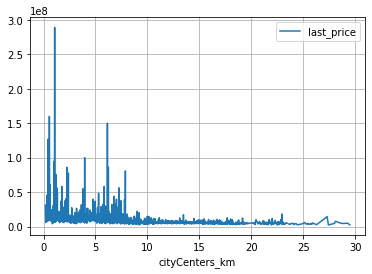

In [68]:
display(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_km', values='last_price', aggfunc='mean')
)
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_km', values='last_price', aggfunc='mean')
    .plot(grid=True)
)

*Вывод:*<br>
Судя по графику, зависимости стоимости квартир от их отдаления от центра города, стоимость квартир уменьшается. Чем дальше находятся обекты от центра города тем  их средняя стоимость ниже. Конечно на грахике присутствуют значения выделяющиеся по стоимости из общего ряда, на общий тренд направлен на снижение стоимости в зависимости от отдаления от центра.

### Общий вывод

В данном проекте провели исследования по данным ЯндексНедвижимость. В дарафрейме бали, там где это возможно, заменены или удалены пропущеные значения. Были выявлены анамилии и ошибки в запеси данных и исправленны эти ошибки. Там где это было необходимы поменяли типа значений данных.<br>
После предобработки данных мы проанализировали данные по каждому столбцу датафрейма, построили гистограммы и диаграммы размаха и выевели их численные выражения<br>
Затем в таблицу мы добавили необходимые для исследования столбцы с данными о дне, месяце и годе публикации объявлений, о категории этажа на котором располагается объект недвижимости и о растоянии отдаления квартир от центра города.<br>
Затем мы исследовали зависимости влияния тех или иных факторов на формирование конечной стоимости квартиры. <br> Проанализировали среднюю стоимость одного квадратного метра недвижипости в десяти крупных населенных пунктах и как средняя стоимость квартиры меняется в зависимости от ее отдаления от центра города. <br>
Так же выявили что иногда на стоимость объета может влиять месяц или даже день подачи обявления. И проследили изменение стоимости квартир с 2014 по 2019 год.<br>
По итогам исследавания можно сказать что при формировании конечной стоимости квариты учитывается множество факторов. Каждый из этих факторов влияет на итоговую стоимость, реже по отдельности и чаще в сумме. Но некоторые являются оновными, например количество комнат, общая площадь и близость к центру.<br>
Выяснели что в среденм с момента публикации до продажи квартиры проходит 95 - 180 дней.<br>
Определили что не всегда в больших городах самые высокие цены, а деревне, как например в Кудрово не самые низкие.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод